In [1]:
import fastf1
import fastf1.plotting
import seaborn as sns
from matplotlib import pyplot as plt

# enabling misc_mpl_mods will turn on minor grid lines that clutters the plot
fastf1.plotting.setup_mpl(mpl_timedelta_support=False, misc_mpl_mods=False)

drivers = ["ALB", "ALO", 
            "BOT", "DEV", 
            "GAS", "HAM", 
            "HUL", "LEC", 
            "MAG", "NOR", 
            "OCO", "PER", 
            "PIA", "RUS", 
            "SAI", "SAR", 
            "STR", "TSU", 
            "VER", "ZHO"]

In [2]:
session = fastf1.get_session(2023, "british", 'R')
session.load()

req         WARNING 	

DEFAULT CACHE ENABLED!
	Cache directory: /Users/gakroppongi/Library/Caches/fastf1.
	Size: 1.92 GB


core           INFO 	Loading data for British Grand Prix - Race [v3.0.3]
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '44', '81', '63', '11', '14', '23', '16', '55', '2', '77', '27', '18', '24', '22', '21', '10', '20', '31']


In [3]:
def lap_time_distribution(session):
    drivers = session.results.Abbreviation
    driver_laps = session.laps.pick_drivers(drivers).pick_quicklaps()
    driver_laps = driver_laps.reset_index()

    finishing_order = [session.get_driver(i).Abbreviation for i in drivers]

    driver_colors = {abv: fastf1.plotting.DRIVER_COLORS[driver] for abv, driver in fastf1.plotting.DRIVER_TRANSLATE.items()}

    # create the figure
    fig, ax = plt.subplots(figsize=(10, 5))

    # Seaborn doesn't have proper timedelta support
    # so we have to convert timedelta to float (in seconds)
    driver_laps["LapTime(s)"] = driver_laps["LapTime"].dt.total_seconds()

    sns.violinplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                inner=None,
                scale="area",
                order=finishing_order,
                palette=driver_colors
                )

    sns.swarmplot(data=driver_laps,
                x="Driver",
                y="LapTime(s)",
                order=finishing_order,
                hue="Compound",
                palette=fastf1.plotting.COMPOUND_COLORS,
                hue_order=["SOFT", "MEDIUM", "HARD"],
                linewidth=0,
                size=5,
                )

    ax.set_xlabel("Driver")
    ax.set_ylabel("Lap Time")
    sns.despine(left=True, bottom=True)

    ax.legend()
    plt.suptitle(f"Lap time distribution \n "f"{session.event['EventName']} {session.event.year} Race")
    plt.figure().set_size_inches(50000, 500000, forward=True)
    fig.set_dpi(1000)

    plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 8.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 15.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 11.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3544: UserWarning: 18.6% of the points cannot be placed; you may want to decrease the size of the markers or use st

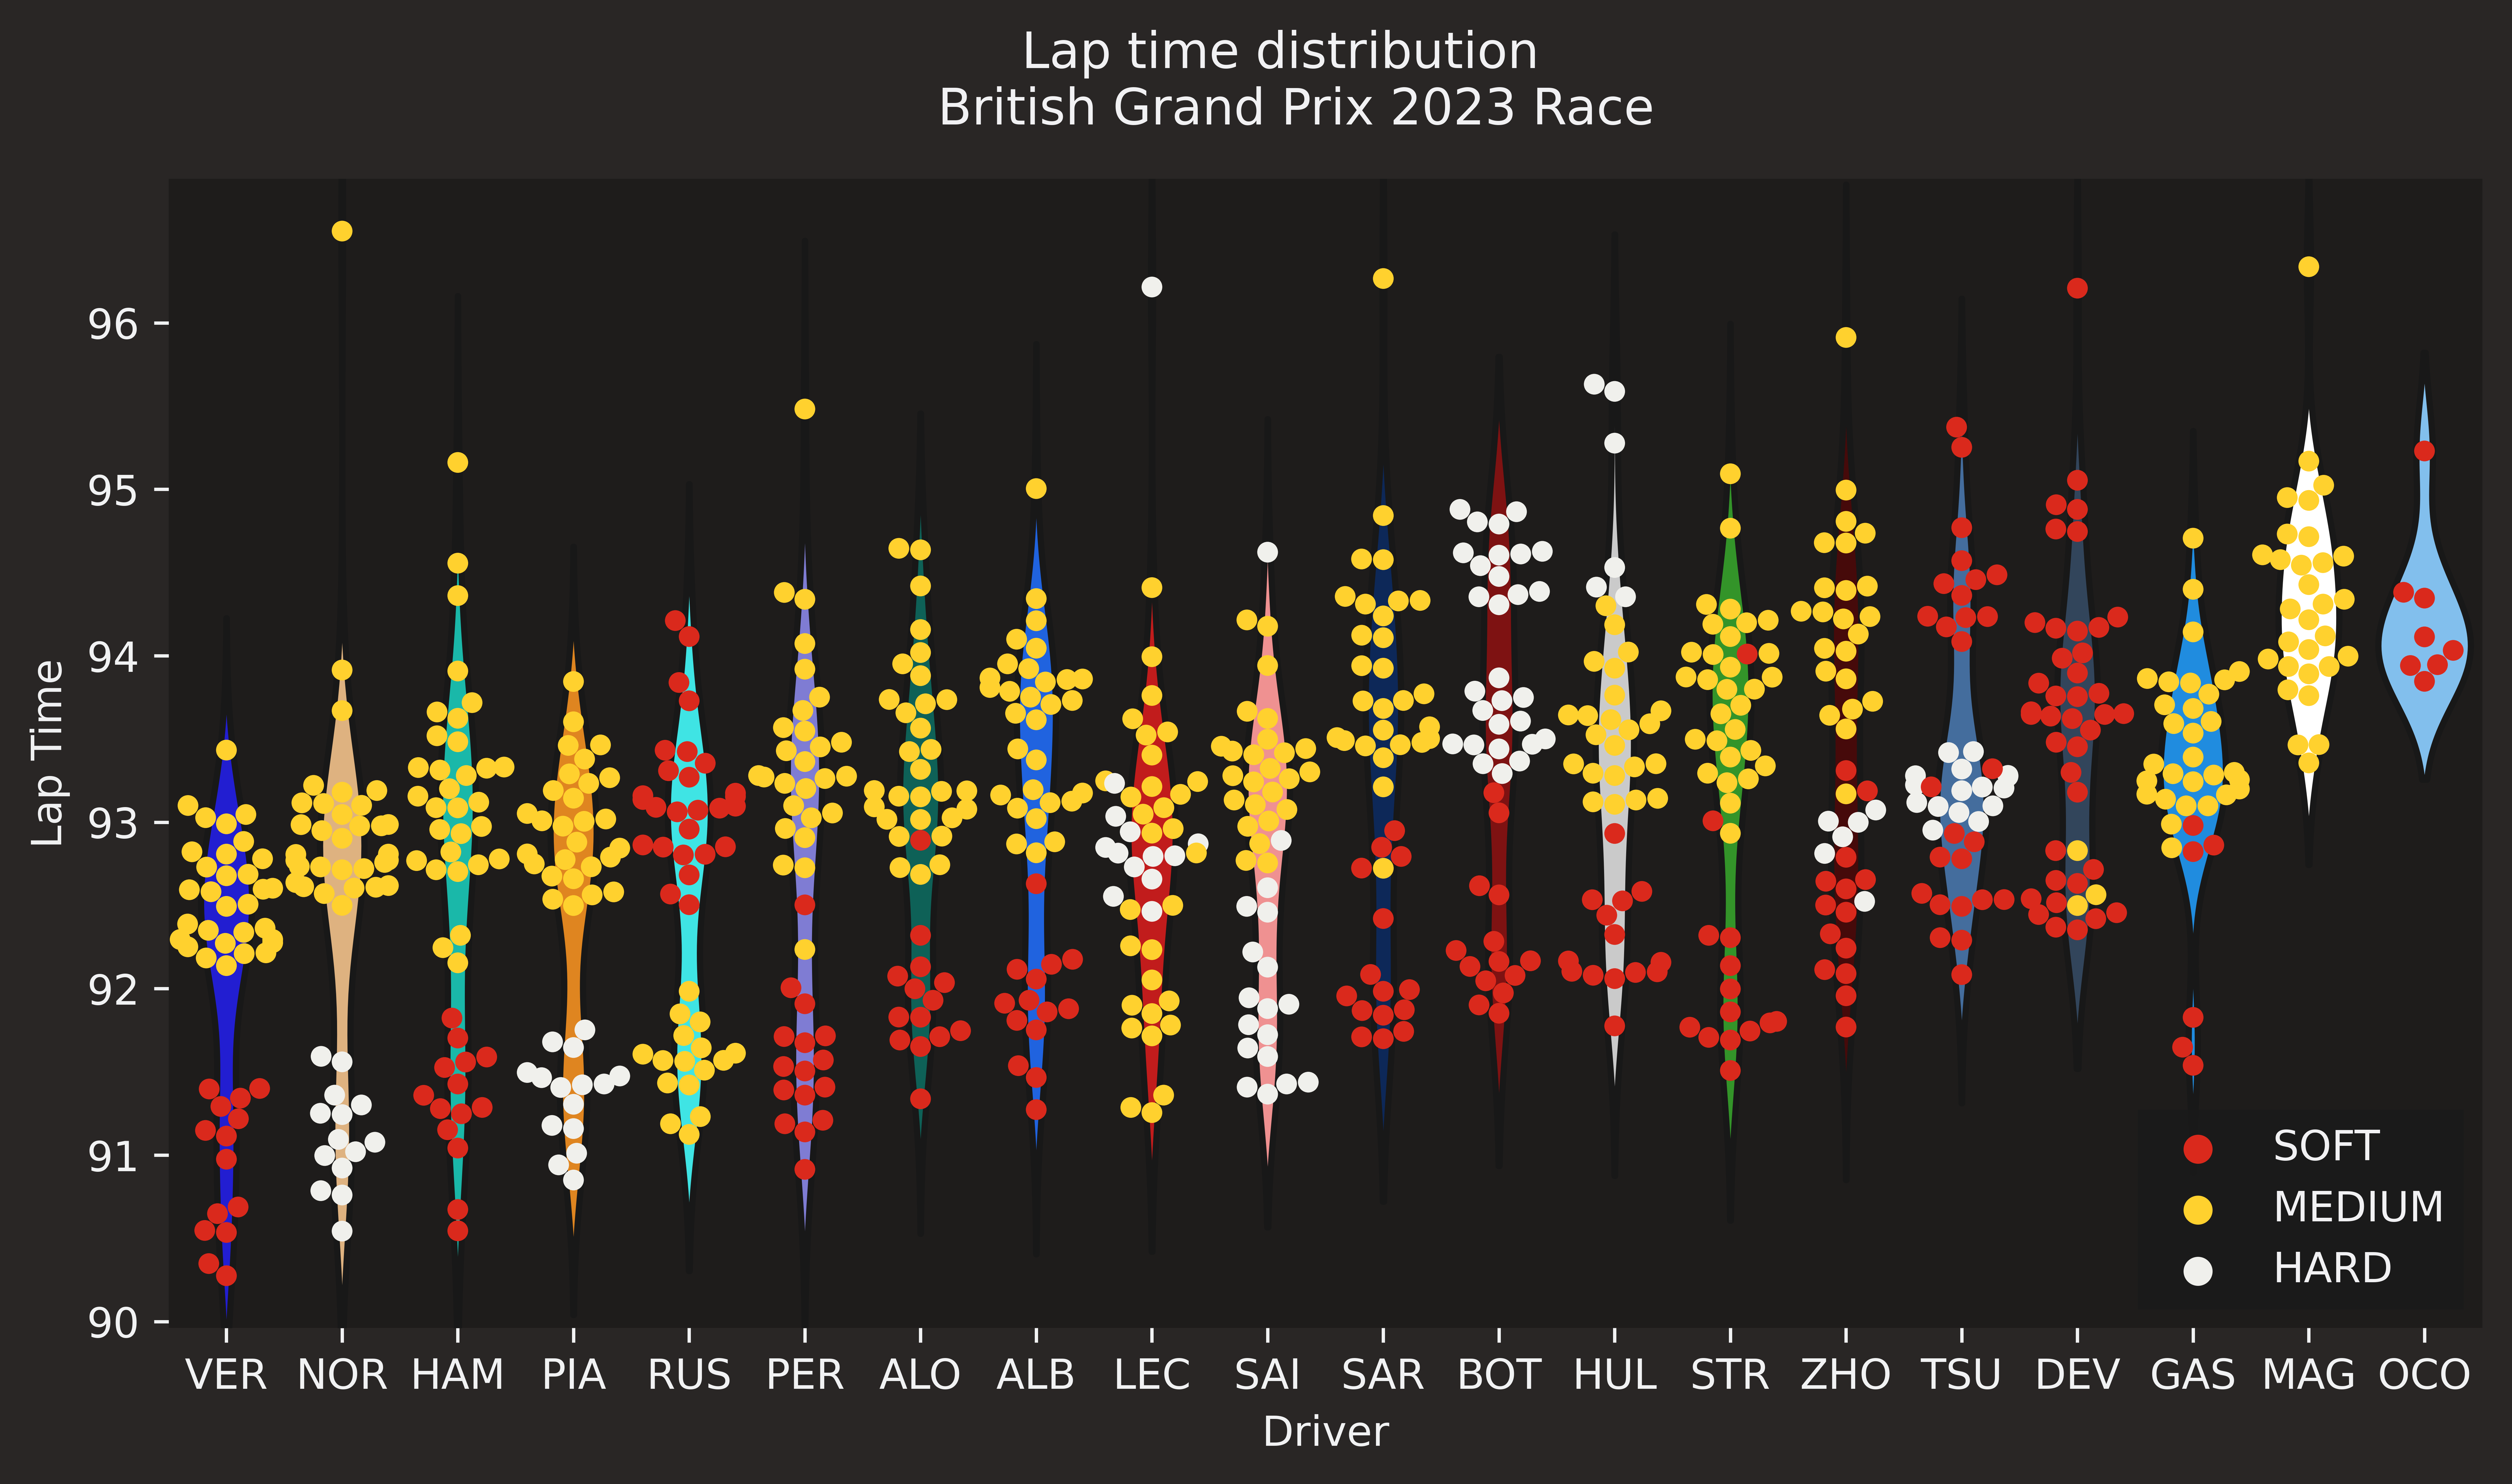

<Figure size 5e+06x5e+07 with 0 Axes>

In [4]:
lap_time_distribution(session)